### Importações necessárias

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
from PIL import Image

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
from time import time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import os

if not os.path.exists("mineração_texto"):
    os.mkdir("mineração_texto")


In [9]:
df_relatos = pd.read_csv('C:\\Users\\carlo\\Downloads\\base_tratada(2019-2023).csv')


### Pré-porcessamento e limpeza dos relatos

In [7]:
total_palavras = df_relatos['relato'].apply(lambda x: len(x.split())).sum()

print(f'Total de palavras no DataFrame: {total_palavras}')

Total de palavras no DataFrame: 9506930


In [8]:
df_relatos.shape

(47607, 21)

In [10]:
relatos=df_relatos[['relato']]

In [10]:
pd.set_option('display.max_colwidth', None)

In [10]:
relatos.head(5)

,relato
0,"nacional marisangela ferreira pacheco uipp - terra firme comunicar citados trabalhando esposa funcinário trabalhar , chamada nezia chaves gomes fazendo escândalo frente loja relatora trabalha . mulher dizia : `` vou pegar cortar toda cara , desa puta , vou deixar arreada chão furar todinha '' ( textuais ) . vítima diz tempo nezia espalha relatora caso marido , levy baia , relatora trabalha . sente constrangida fofocas ameaças , tempo pede levy convencer esposa dois relação , rapaz faz nada , fica calado . sabe suspeita reside marambaia , passagem simão jatene , número 7 , água cristal trabalha passagem francisco xavier , final jabatiteua , padaria fica esquina , próximo vileta ."
1,"relatora qualificada , seccional urbana polícia , declarar 26/01/2019 , 18:00 , enquanto visitava tia ( nacional “ geraldina brito sales ) , hospital saúde mulher , ap 810 , localizada tv . humaita , 1558 – marco , 66085-220 , agredida fisicamente tapas , arranhões , puxões socos região rosto , tórax membros superiores nacional “ simone carla sales duarte ” , prima . contenda começou devido problemas familiares relatora revidou procurou afastar ímpeto agressivo nacional ; satisfeita , nacional agressora proferiu impropérios , dentro : “ louca ” , “ pilantra , safada ” , “ filha puta ” etc . momentos antes realizou atos contra outros parentes dentro deste hospital . local momento agressões presentes enfermeiras plantão , estando disponíveis testemunhas . findo ocorrência , relatora dirigiu-se seccional urbana , pois pretende tomar devidas providências legais . registra-se direito ."
2,", especializada denunciar irmão ailton silva farias , 62 , taxista , tv . humaitá , nº262 , casa 3 , bairro : pedreira , belém-pa. comunica irmão agressivo . , 02/11/2019 13:00 relatora limpando residência , ouviu populares gritando ailton ia matar marido . relatora correu presenciou ailton faca tentando acertar marido relatora , dentro veículo . relatora ailton ia matar marido , relatora puxou ailton braço ailton tentou furar relatora faca . filha relatora correu conseguiu segurar ailton , ofendeu relatora : “ vagabunda , prostituta , ladrona ’ . relatora afirma ailton alcoolizado . oferecido abrigo relatora interesse , oferecido medidas protetivas relatora requererá seguintes : aproximação ofendida , familiares testemunhas , limite mínimo distância agressor ; contato ofendida , familiares testemunhas qualquer comunicação . deseja representar criminalmente contra ailton silva farias , 62 , taxista , tv . humaitá , nº262 , casa 3 , bairro : pedreira , belém-pa. apresentou filha testemunha vania gleyce ribeiro tavares . registra-se/////////"
3,"relator qualificado , qualidade policial militar , apresenta nessa delegacia especializada nacional david melo mamede , solteiro , 23 , nascido 07/12/1996 , natural belém/pa , filho maria iraci oliveira melo antônio jarbas gonçalves mamede , ocupação , beco jorge , nº 36 , pass . nova rua iracema , bairro : marambaia , belém/pa , virtude ter agredido fisicamente ameaçado companheira vania sousa farias , solteira , 31 , nascida 26/08/1988 , natural augusto correa/pa , filha rosilene sousa farias antônio ferreira farias , autônoma , rua airton senna , nº 01 , próximo av . brasil , bairro : 40 horas ( coqueiro ) , ananindeua/pa ; ( 06/11/2019 ) , 13:00 horas , serviço ronda bairro marambaia , acionado via ciop informação havia casal discutindo residência ; ato contínuo dirigiu endereço informado , encontrou vítima , relatou desde ontem casal discutindo chegou registrar ocorrência manhã ( 06/11/2019 ) novamente ameaçado morte agredido fisicamente ; diante tal situação , todos conduzidos apresentados autoridade policial plantonista , determinou lavratura auto prisão flagrante delito crime lesão corporal ameaça - violência doméstica . registra-se providências cabíveis///////////////"
4,"relatora qualificada epígrafe seccional comunicar vítima ameças ex companheiro , dheison rosário souza , ( domiciliado pa140 , rua santa lu

* Limpeza e remoção de palvras inadequadas

In [11]:
stop_words = set(stopwords.words("portuguese"))
stop_words.update(['fica', 'fim', 'ato', 'desde', 'pois', 'abadessa',
                   'abaetetuba', 'abaetetuba abaetetuba', 'abaetetuba contatos',
                   'abaixa', 'abaixada', 'abaixado', 'abaixar','abaixar som', 'abaixar volume',
                   'abaixasse', 'abaixasse som', 'abaixo', 'abaixo assinado','abaixo elencadas', 
                   'abaixo informacoes', 'abaixo olho','abaixo proibicao', 'abaixo proibição', 
                   'abaixou', 'abaixou pegar','abaixou vidro', 'relatora', 'policial', 'militar', 
                   'jurunas', 'silva', 'vtr', 'ciop', 'santos', 'bairro', 'fato','via', 'havia', 
                   'guarnicao', 'relator', 'sido', 'policia', 'sgt', 'rua','nacional', 'seccional', 
                   'icoaraci', 'urbana', 'seccional urbana', 'local', 'fato','silva', 'carlos', 'comunicar', 
                   'bairro','sacramenta', 'rua', 'qualificada seccional','marambaia', 'passagem', 'momento', 
                   'relatante','cpf', 'vou', 'textuais', 'vai', 'maria', 'vem', 'sra', 'depoente', 'relata', 
                   'jose', 'apos', 'nacional', 'local', 'celular', 'iria','relator', 'declarante', 'declarado', 
                   'policiais', 'guarnição', 'souza', 'antonio', 'paulo', 'santos', 'vou', 'textuais', 'qualificada',
                   'comparece','seguinte','comunicante', 'comunica', 'mencionados','comunica delegacia','virtual mencionados',
                   'belem', 'vtima', 'serao anexadas','pra','fazer'
])

stop_words = list(stop_words)


relatos_limpos = []
for w in range(len(relatos)):
  Relato = relatos['relato'].iloc[w]

  Relato  = re.sub("(\\d|\\W)+|\w*\d\w*"," ",Relato )
  Relato = ' '.join(s for s in Relato.split() if (not any(c.isdigit() for c in s)) and len(s) > 2)
  relatos_limpos.append(Relato)


relatos_limpos[0:5]

['nacional MARISANGELA FERREIRA PACHECO compareceu esta UIPP Terra Firme para comunicar que dia hora acima citados estava trabalhando quando esposa funcinário com quem trabalhar chamada Nezia Chaves Gomes estava fazendo escândalo frente loja onde relatora trabalha Que mulher dizia Vou pegar cortar toda tua cara desa puta vou deixar arreada chão furar todinha textuais Que vítima diz que muito tempo Nezia espalha que relatora tem caso marido dela Levy Baia com quem relatora trabalha Que sente constrangida com fofocas ameaças que muito tempo ela pede para Levy convencer sua esposa que dois não tem uma relação que rapaz não faz nada fica calado Que sabe que suspeita reside Marambaia passagem Simão Jatene número água cristal trabalha Passagem Francisco Xavier final jabatiteua padaria que fica esquina próximo Vileta',
 'relatora acima qualificada compareceu esta Seccional Urbana Polícia para declarar que dia por volta enquanto visitava uma tia nacional GERALDINA BRITO SALES Hospital Saúde Mu

In [12]:
relatos.head(5)

,relato
0,"nacional marisangela ferreira pacheco uipp - terra firme comunicar citados trabalhando esposa funcinário trabalhar , chamada nezia chaves gomes fazendo escândalo frente loja relatora trabalha . mulher dizia : `` vou pegar cortar toda cara , desa puta , vou deixar arreada chão furar todinha '' ( textuais ) . vítima diz tempo nezia espalha relatora caso marido , levy baia , relatora trabalha . sente constrangida fofocas ameaças , tempo pede levy convencer esposa dois relação , rapaz faz nada , fica calado . sabe suspeita reside marambaia , passagem simão jatene , número 7 , água cristal trabalha passagem francisco xavier , final jabatiteua , padaria fica esquina , próximo vileta ."
1,"relatora qualificada , seccional urbana polícia , declarar 26/01/2019 , 18:00 , enquanto visitava tia ( nacional “ geraldina brito sales ) , hospital saúde mulher , ap 810 , localizada tv . humaita , 1558 – marco , 66085-220 , agredida fisicamente tapas , arranhões , puxões socos região rosto , tórax membros superiores nacional “ simone carla sales duarte ” , prima . contenda começou devido problemas familiares relatora revidou procurou afastar ímpeto agressivo nacional ; satisfeita , nacional agressora proferiu impropérios , dentro : “ louca ” , “ pilantra , safada ” , “ filha puta ” etc . momentos antes realizou atos contra outros parentes dentro deste hospital . local momento agressões presentes enfermeiras plantão , estando disponíveis testemunhas . findo ocorrência , relatora dirigiu-se seccional urbana , pois pretende tomar devidas providências legais . registra-se direito ."
2,", especializada denunciar irmão ailton silva farias , 62 , taxista , tv . humaitá , nº262 , casa 3 , bairro : pedreira , belém-pa. comunica irmão agressivo . , 02/11/2019 13:00 relatora limpando residência , ouviu populares gritando ailton ia matar marido . relatora correu presenciou ailton faca tentando acertar marido relatora , dentro veículo . relatora ailton ia matar marido , relatora puxou ailton braço ailton tentou furar relatora faca . filha relatora correu conseguiu segurar ailton , ofendeu relatora : “ vagabunda , prostituta , ladrona ’ . relatora afirma ailton alcoolizado . oferecido abrigo relatora interesse , oferecido medidas protetivas relatora requererá seguintes : aproximação ofendida , familiares testemunhas , limite mínimo distância agressor ; contato ofendida , familiares testemunhas qualquer comunicação . deseja representar criminalmente contra ailton silva farias , 62 , taxista , tv . humaitá , nº262 , casa 3 , bairro : pedreira , belém-pa. apresentou filha testemunha vania gleyce ribeiro tavares . registra-se/////////"
3,"relator qualificado , qualidade policial militar , apresenta nessa delegacia especializada nacional david melo mamede , solteiro , 23 , nascido 07/12/1996 , natural belém/pa , filho maria iraci oliveira melo antônio jarbas gonçalves mamede , ocupação , beco jorge , nº 36 , pass . nova rua iracema , bairro : marambaia , belém/pa , virtude ter agredido fisicamente ameaçado companheira vania sousa farias , solteira , 31 , nascida 26/08/1988 , natural augusto correa/pa , filha rosilene sousa farias antônio ferreira farias , autônoma , rua airton senna , nº 01 , próximo av . brasil , bairro : 40 horas ( coqueiro ) , ananindeua/pa ; ( 06/11/2019 ) , 13:00 horas , serviço ronda bairro marambaia , acionado via ciop informação havia casal discutindo residência ; ato contínuo dirigiu endereço informado , encontrou vítima , relatou desde ontem casal discutindo chegou registrar ocorrência manhã ( 06/11/2019 ) novamente ameaçado morte agredido fisicamente ; diante tal situação , todos conduzidos apresentados autoridade policial plantonista , determinou lavratura auto prisão flagrante delito crime lesão corporal ameaça - violência doméstica . registra-se providências cabíveis///////////////"
4,"relatora qualificada epígrafe seccional comunicar vítima ameças ex companheiro , dheison rosário souza , ( domiciliado pa140 , rua santa lu

* Nuvem de palavras dos relatos

In [12]:
relatos_limpos = []
for w in range(len(relatos)):
  Relato = relatos['relato'].iloc[w]
  Relato  = re.sub("(\\d|\\W)+|\w*\d\w*"," ",Relato )
  Relato = ' '.join(s for s in Relato.split() if (not any(c.isdigit() for c in s)) and len(s) > 2)
  relatos_limpos.append(Relato)

text_filtered = ' '.join(relatos_limpos)

<>:4: DeprecationWarning: invalid escape sequence '\w'
<>:4: DeprecationWarning: invalid escape sequence '\w'
C:\Users\carlo\AppData\Local\Temp\ipykernel_6248\1863270932.py:4: DeprecationWarning: invalid escape sequence '\w'
  Relato  = re.sub("(\\d|\\W)+|\w*\d\w*"," ",Relato )


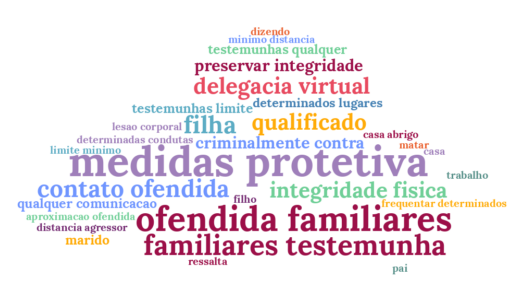

In [15]:
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    custom_palette= ['#9c0f48','#6FCF97','#722770','#ea5f2d','#6f95ff','#ffab07','#9F7FBA','#548e87', '#5cacc4','#e84a5f', '#4682B4']
    return np.random.choice(custom_palette)

mascara = np.array(Image.open('C:\\Users\\carlo\\Downloads\\nuvem1.jpg'))

wordcloud = WordCloud(stopwords=stop_words, 
                      max_words=60, 
                      width=750, 
                      height=500,
                      max_font_size=80, min_font_size=20,
                      background_color='#FFFFFF', 
                      mask=mascara,
                      prefer_horizontal=1.0,
                      font_path="C:\\Users\\carlo\\Downloads\\lora\\Lora-Bold.ttf",
                      color_func=custom_color_func).generate(text_filtered)

# Mostrar a nuvem de palavras
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

svg_data = wordcloud.to_svg()
with open("C:\\Users\\carlo\\Downloads\\nuvem_palavras.svg", "w") as f:
    f.write(svg_data)
    
#with open("mineração_texto/nuvem_palavras_relatos.svg", "w") as f:
    #f.write(wordcloud.to_svg())

In [ ]:
translation_dict = {
    "dizendo": "saying",
    "minimo": "minimum",
    "distancia": "distance",
    "testemunhas": "witnesses",
    "qualquer": "any",
    "preservar": "preserve",
    "integridade": "integrity",
    "delegacia": "delegacy",
    "determinados": "specific",
    "lugares": "places",
    "testemunhas": "witnesses",
    "limite": "limit",
    "qualificado": "qualified",
    "filho": "son",
    "filha": "daughter",
    "lesão": "harm",
    "lesao": "harm",
    "corporal": "bodily",
    "determinadas": "certain",
    "condutas": "conducts",
    "casa": "house",
    "abrigo": "shelter",
    "matar": "kill",
    "casa": "house",
    "trabalho": "work",
    "frequentar": "attend",
    "determinados": "specific",
    "integridade": "integrity",
    "fisica": "physical",
    "protetivas": "protective",
    "medidas": "measures",
    "contato": "contact",
    "ofendida": "offended",
    "aprocimacao": "approach",
    "familiares": "family members",
    "ressalta": "Emphasizes",
    "agressor": "aggressor",
    "marido": "husband",
    "comunicacao": "communication",
    "criminalmente": "criminally",
    "contra": "against",
    "qualificado": "qualified",
    "pai": "father",
    "aproximacao": "approximation",
    "medidas protetiva": "protective measures",
    "contato ofendida": "contact with the offended",
    "aproximacao ofendida": "approach of the offended",
    "distancia agressor": "distance from the aggressor",
    "qualquer comunicacao": "any communication",
    "preservar integridade": "preserve integrity",
    "lesao corporal": "bodily injury",
    "delegacia virtual": "virtual police station",
    "casa abrigo": "shelter house",
    "integridade física": "physical integrity",
    "frequentar determinados": "attend specific",
    "testemunhas qualquer": "any witnesses",
    "limite minimo": "minimum limit",
    "determinadas condutas": "specific conducts",
    "criminalmente contra": "criminally against"
    
}

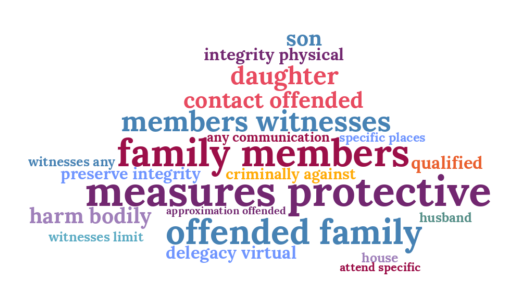

In [62]:
# Função de cores personalizadas
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    custom_palette = ['#9c0f48', '#6FCF97', '#722770', '#ea5f2d', '#6f95ff', '#ffab07', '#9F7FBA', '#548e87', '#5cacc4', '#e84a5f', '#4682B4']
    return np.random.choice(custom_palette)

text_filtered = " ".join(translation_dict.get(word, word) for word in text_filtered.split())

mascara = np.array(Image.open('C:\\Users\\carlo\\Downloads\\nuvem1.jpg'))

wordcloud = WordCloud(stopwords=stop_words, 
                      max_words=75, 
                      width=700, 
                      height=500,
                      max_font_size=80, 
                      min_font_size=20,
                      background_color='#FFFFFF', 
                      mask=mascara,
                      prefer_horizontal=1.0,
                      font_path="C:\\Users\\carlo\\Downloads\\lora\\Lora-Bold.ttf",
                      color_func=custom_color_func).generate(text_filtered)

# Mostrar a nuvem de palavras
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Salvar como SVG
svg_data = wordcloud.to_svg()
with open("C:\\Users\\carlo\\Downloads\\nuvem_ingles1.svg", "w") as f:
    f.write(svg_data)


* Processo de vetorização

In [12]:
tf_vectorizer = CountVectorizer(
    min_df=5,           # Considera palavras que aparecem em pelo menos 5 documentos
    max_df=0.5,          # Exclui termos que aparecem em mais de 50% dos documentos
    max_features=50000,  # Limita o número de termos no vocabulário aos 50.000 mais frequentes
    stop_words=stop_words, # Remove palavras comuns que não são úteis
    ngram_range=(1, 2)   # Considera uni-gramas (termos únicos) e bi-gramas (pares de termos)
)

#Transformação
vec_text = tf_vectorizer.fit_transform(relatos_limpos)

#Retorna a lista de palavras
words = tf_vectorizer.get_feature_names_out()

print(vec_text.shape)
print(len(words))

c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anexadas', 'assinado', 'contatos', 'delegacia', 'elencadas', 'informacoes', 'olho', 'pegar', 'proibicao', 'proibição', 'serao', 'som', 'vidro', 'virtual', 'volume'] not in stop_words.
  warnings.warn(


(47607, 50000)
50000


In [27]:
words[0:20]

array(['abala', 'abalada', 'abalada emocionalmente', 'abalada medo',
       'abalada psicologicamente', 'abalada situacao', 'abalada teme',
       'abalado', 'abalado psicologico', 'abalados', 'abalando', 'abalar',
       'abalo', 'abalo emocional', 'abalo psicologico', 'abalos',
       'abalos psicológicos', 'abalou', 'abandona', 'abandonada'],
      dtype=object)

### Implementação do LDA

#### Encontrar os tópicos

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

In [14]:
def print_top_words(model, feature_names, n_top_words):
  #Essa função imprime as palavras mais importantes para cada tópico descoberto pelo modelo LDA.
  for topic_idx, topic in enumerate(model.components_):
    print("\n--\nTopic #{}: ".format(topic_idx + 1))
    message = ", ".join([feature_names[i]
                          for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()

def display_topics(W, H, feature_names, relatos, no_top_words, no_top_documents):
    #Essa função exibe os tópicos e os documentos mais representativos para cada tópico.
    for topic_idx, topic in enumerate(H):
        print("\n--\nTopic #{}: ".format(topic_idx + 1))
        print(", ".join([feature_names[i]
                for i in topic.argsort()[:-no_top_words - 1:-1]]).upper())
        top_d_idx = np.argsort(W[:,topic_idx])[::-1][0:no_top_documents]
        for d in top_d_idx:
            print('Relato índice {} : \t{:.2f}'.format(d, W[d, topic_idx]))

#### Modelo de Latent Dirichlet Allocation (LDA) com a biblioteca scikit-learn para realizar modelagem de tópicos no conjunto de relatos representados por vetores de contagem de palavras.

In [15]:
lda = LatentDirichletAllocation(n_components=20, 
                                learning_method='batch', # 'online' equivale a minibatch no k-means
                                random_state=0)

t0 = time()

lda.fit(vec_text)
doc_topic_matrix = lda.transform(vec_text) #Converte os documentos representados pelos vetores vec_text em distribuições de tópicos, onde cada linha da matriz resultante (doc_topic_matrix) representa um documento e cada coluna representa a probabilidade do documento pertencer a um determinado tópico.

print("done in %0.3fs." % (time() - t0))

done in 1238.663s.


* Palavras mais associadas com cada tópico

In [24]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, 10)


Topics in LDA model:

--
Topic #1: 
oferecido, deseja, nao, especializada, relacionamento, nascido, anos, representar, medidas, representar criminalmente

--
Topic #2: 
nao, agressor, ofendida, proibicao, contato, proibicao agressor, filho, casal, medidas, companheiro

--
Topic #3: 
ofendida, nao, proibicao, familiares, ofendida familiares, familiares testemunhas, testemunhas, agressor, contato, aproximacao

--
Topic #4: 
menor, filha, informa, onde, filho, mesma, anos, pai, idade, sendo

--
Topic #5: 
nao, anos, medidas, protetivas, medidas protetivas, filhos, companheiro, relacao, contra, data

--
Topic #6: 
vitima, domestica, violencia, violencia domestica, ate, acusado, delegacia, aludido, mulher, especializada

--
Topic #7: 
nao, anos, filho, volta, tendo, horas, medidas, especializada, telefone, volta horas

--
Topic #8: 
anos, companheiro, medidas, filho, protetivas, medidas protetivas, belém, contra, agressor, endereço

--
Topic #9: 
nao, ameaca, atraves, hora, delegacia, conf

- Probabilidade de cada topico

In [25]:
topic_probabilities = doc_topic_matrix.mean(axis=0)
topic_percentages = topic_probabilities * 100

for topic_idx, percentage in enumerate(topic_percentages):
    print(f"Tópico {topic_idx + 1}: {percentage:.2f}%")


Tópico 1: 2.67%
Tópico 2: 2.67%
Tópico 3: 6.15%
Tópico 4: 3.71%
Tópico 5: 4.29%
Tópico 6: 4.67%
Tópico 7: 4.00%
Tópico 8: 3.57%
Tópico 9: 7.17%
Tópico 10: 1.34%
Tópico 11: 3.03%
Tópico 12: 4.62%
Tópico 13: 9.74%
Tópico 14: 2.22%
Tópico 15: 3.05%
Tópico 16: 4.75%
Tópico 17: 9.97%
Tópico 18: 10.61%
Tópico 19: 7.24%
Tópico 20: 4.52%


In [26]:
n_topics = lda.components_.shape[0]

dominant_topic_per_doc = np.argmax(doc_topic_matrix, axis=1)

topic_distribution = np.mean(doc_topic_matrix, axis=0)

for i, prob in enumerate(topic_distribution):
    print(f"Tópico {i + 1}: Probabilidade média = {prob:.3f} ({prob*100:.2f}%)")


Tópico 1: Probabilidade média = 0.027 (2.67%)
Tópico 2: Probabilidade média = 0.027 (2.67%)
Tópico 3: Probabilidade média = 0.061 (6.15%)
Tópico 4: Probabilidade média = 0.037 (3.71%)
Tópico 5: Probabilidade média = 0.043 (4.29%)
Tópico 6: Probabilidade média = 0.047 (4.67%)
Tópico 7: Probabilidade média = 0.040 (4.00%)
Tópico 8: Probabilidade média = 0.036 (3.57%)
Tópico 9: Probabilidade média = 0.072 (7.17%)
Tópico 10: Probabilidade média = 0.013 (1.34%)
Tópico 11: Probabilidade média = 0.030 (3.03%)
Tópico 12: Probabilidade média = 0.046 (4.62%)
Tópico 13: Probabilidade média = 0.097 (9.74%)
Tópico 14: Probabilidade média = 0.022 (2.22%)
Tópico 15: Probabilidade média = 0.031 (3.05%)
Tópico 16: Probabilidade média = 0.048 (4.75%)
Tópico 17: Probabilidade média = 0.100 (9.97%)
Tópico 18: Probabilidade média = 0.106 (10.61%)
Tópico 19: Probabilidade média = 0.072 (7.24%)
Tópico 20: Probabilidade média = 0.045 (4.52%)


* Documentos mais associados a cada topico

In [27]:
display_topics(doc_topic_matrix, lda.components_, tf_feature_names, relatos, 10, 10)


--
Topic #1: 
OFERECIDO, DESEJA, NAO, ESPECIALIZADA, RELACIONAMENTO, NASCIDO, ANOS, REPRESENTAR, MEDIDAS, REPRESENTAR CRIMINALMENTE
Relato índice 22792 : 	0.99
Relato índice 19257 : 	0.98
Relato índice 39270 : 	0.96
Relato índice 38692 : 	0.95
Relato índice 38694 : 	0.95
Relato índice 26969 : 	0.95
Relato índice 42721 : 	0.92
Relato índice 23164 : 	0.92
Relato índice 33691 : 	0.87
Relato índice 32855 : 	0.87

--
Topic #2: 
NAO, AGRESSOR, OFENDIDA, PROIBICAO, CONTATO, PROIBICAO AGRESSOR, FILHO, CASAL, MEDIDAS, COMPANHEIRO
Relato índice 34994 : 	1.00
Relato índice 29060 : 	1.00
Relato índice 36535 : 	1.00
Relato índice 41585 : 	1.00
Relato índice 21540 : 	1.00
Relato índice 47263 : 	1.00
Relato índice 21092 : 	1.00
Relato índice 44951 : 	1.00
Relato índice 21194 : 	1.00
Relato índice 44953 : 	1.00

--
Topic #3: 
OFENDIDA, NAO, PROIBICAO, FAMILIARES, OFENDIDA FAMILIARES, FAMILIARES TESTEMUNHAS, TESTEMUNHAS, AGRESSOR, CONTATO, APROXIMACAO
Relato índice 27894 : 	1.00
Relato índice 29774 : 

In [28]:
print('Matriz documento-tópicos:' + str(doc_topic_matrix.shape))
print('Matriz tópicos-termos:' + str(lda.components_.shape))

Matriz documento-tópicos:(47607, 20)
Matriz tópicos-termos:(20, 50000)


* Atribuir um tópico principal a cada documento com base nas distribuições de tópicos obtidas do modelo LDA.

In [29]:
main_topic = []
mt_prob = []
for l in range(len(relatos['relato'])):
  main_topic.append(doc_topic_matrix[l, :].argmax() + 1)
  mt_prob.append(doc_topic_matrix[l, :].max())

relatos = relatos.assign(main_topic=main_topic, main_topic_prob=mt_prob)


In [33]:
topico = 1
pd.options.display.max_colwidth = 300
relatos[relatos['main_topic'] == topico].sort_values('main_topic_prob', ascending = False)[['main_topic_prob','relato']].head(20).sample(10)

,main_topic_prob,relato
11585,0.995262,"ameaçada ex-companheiro oséias novaes malato , rg.3009980 , nascido 27/09/76 , filho francisco contente malato ana novaes malato , rua presidente getúlio vargas nº444 , bairro tapanã , final linha ônibus pratinha presidente vargas ps . amora , contato 98554 0757. relata mês março familia viajou ..."
4128,0.995754,"ameaçada ex-companheiro deivison raimundo silva bessa , paraense , rg.7051804 , nascido 30/11/95 , filho deuzarina silva gomes , rua samaumeira nº27-fundos , bairro terra firme , conviveu durante 04 , tendo dois filhos menores ( 01 02 ) , fruto relação . casal separado 04 meses , crianças ficara..."
6653,0.996296,"agredida fisicamente ameaçada ex-companheiro janei costa vilhena , paraense , rg.3035468 , nascido 12/06/82 , filho angela merice ferreira costa , rua horta , ps . duas estrelas , vila aparecida , nº90-a , bairro pratinha i , próximo padaria supermercado ademir . casal convive 18 , tendo 04 filh..."
14631,0.995544,"ameaçada ex-marido evaldo monteiro natividade , rg.1328922 , nascido 15/1/1966 , filho dulce monteiro natividade , cj . cidade nova vi , we 69 , casa 1132 , bairro coqueiro/ananindeua , próximo lider cidade nova , contato 98966 4243. relata casal separado semana , declarante pediu evaldo saísse ..."
13610,0.995945,"ameaçada irmão manoel domingos fonseca silva , . 3803122 , nascido 17/8/1980 , filho maria domingas fonseca silva , cj . tenoné iii , rua manoel , casa 104 , bairro tenoné lado igreja pedro , contato telefônico . relata nacional padrasto jamyle michely silva alves , 18 , ano morando casa declara..."
15720,0.995734,"ameaçada ex-companheiro mário augusto barbosa alves,40 , rg.3040235 , nascido 07/04/1978 , filho maria josé barbosa pereira , av senador lemos , ps . bom sossego nº823 , bairro sacramenta próximo motel caribe canal pirajá , contato telefônico . 11 dezembro , indo local trabalho abordada mário am..."
375,0.996715,"agredida fisicamente ex-marido bruno dacier lobato moreira castro , rg.3813073 , nascido 21/4/1983 , filho helena dacier lobato moreira castro , rod . augusto montenegro , condomínio cidade jardim i , rua cemélia , qd 03-b , casa 17 , bairro parque verde , contato 98233 5999 conviveu durante 11 ..."
13089,0.997230,"ameaçada ex-companheiro augusto cesar corpes silva , rg.4606664 , nascido 7/4/1983 , filho maria conceição corpes silva , rua ronaldo barata nº189 , q-106 , bairro parque verde , próximo av . independência , contato 98330 3554 , conviveu 17 , tendo 03 filhos união . relacionamento conflituoso , ..."
17782,0.995262,"ameaçada companheiro derivaldo jinkings , . 4386712 , nascida 07/04/1978 , filho natividade jinkings , rua primeiro maio nº27 , bairro águas lindas/belém , atrás arena ageu , contato telefônico , convive 12 , tendo filho dessa relação . relacionamento casal conturbado decorrência nacional agress..."
2287,0.995693,"ameaçada ex-companheiro josé raimundo brabo pinheiro , rg.2071064 , nascido 06/06/64 , filho maria assunção brabo pinheiro , rua mundurucus nº210 , bairro jurunas , av . bernardo sayão trav . breves , conviveu 23 , estando separados 09 meses , tendo duas filhas 17 21 . apesar casal separado , na..."


* Tópicos por documento

In [30]:
# Nomes das colunas dos tópicos
topicnames = ["Topic {}".format(i + 1) for i in range(doc_topic_matrix.shape[1])]

# Criar DataFrame relato_topico
relato_topico = pd.DataFrame(np.round(doc_topic_matrix, 2), columns=topicnames, index=relatos.index)

# Adicionar o índice do relato ao DataFrame relato_topico
relato_topico['Relato_Index'] = relatos.index

# Reorganizar as colunas
ordem = ['Relato_Index']
ordem.extend(topicnames)
relato_topico = relato_topico[ordem]

# Visualizar o DataFrame relato_topico
relato_topico.head()



,Relato_Index,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
0,0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.05,0.68,0.0,0.00,0.09,0.16,0.0,0.00,0.00
1,1,0.00,0.02,0.0,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.22,0.0,0.00,0.00,0.05,0.0,0.70,0.00
2,2,0.33,0.00,0.0,0.00,0.0,0.00,0.00,0.07,0.0,...,0.46,0.00,0.13,0.0,0.00,0.00,0.00,0.0,0.00,0.00
3,3,0.00,0.00,0.0,0.00,0.0,0.36,0.00,0.23,0.0,...,0.00,0.20,0.00,0.0,0.00,0.00,0.00,0.0,0.21,0.00
4,4,0.16,0.00,0.0,0.14,0.0,0.00,0.03,0.00,0.0,...,0.00,0.00,0.18,0.0,0.18,0.29,0.00,0.0,0.00,0.02


### Visualizações

In [1]:
import pyLDAvis
from pyLDAvis import lda_model

pyLDAvis.enable_notebook()

* Função prepare para preparar os dados para visualização de tópicos utilizando o modelo LDA.

In [35]:
fig_width = 600
fig_height = 400

lda_vis = pyLDAvis.lda_model.prepare(lda, vec_text, tf_vectorizer, sort_topics=False, mds='tsne', R=10)

pyLDAvis.save_html(lda_vis, 'lda_vis.html')
pyLDAvis.display(lda_vis)

plt.figure(figsize=(fig_width, fig_height))

<Figure size 60000x40000 with 0 Axes>

<Figure size 60000x40000 with 0 Axes>

In [36]:
pyLDAvis.lda_model.prepare(lda, vec_text, tf_vectorizer, sort_topics=False, mds = 'tsne', R=10)

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      246.190277 -182.366913       1        1   9.288300
1      -48.482487  -79.813370       2        1   9.919922
2     -216.981842  -33.145527       3        1  12.913032
3     -195.765015  215.867950       4        1  10.965167
4      231.552353  124.121017       5        1  11.464795
5      157.695114  -48.290783       6        1   5.831930
6       44.257294 -215.768372       7        1   8.316008
7       45.027657  246.678467       8        1   5.038748
8      -88.105232   96.245224       9        1  11.372648
9       61.499069   68.997650      10        1  14.889451, topic_info=                         Term          Freq         Total Category  logprob  \
32888                ofendida  24790.000000  24790.000000  Default  10.0000   
37297               proibicao  13442.000000  13442.000000  Default   9.0000   
32915     ofendida familiares  10354.000000  10354.000000  Default   8.0000   
19828  familiares testemunhas   9677.000000   9677.000000  Default   7.0000   
45982             testemunhas  12718.000000  12718.000000  Default   6.0000   
...                       ...           ...           ...      ...      ...   
21010                   filho   5143.573487  24139.439730  Topic10  -5.0600   
49005                  vitima   4966.312281  23366.916718  Topic10  -5.0951   
37484              protetivas   4086.584964  16228.747167  Topic10  -5.2901   
29056      medidas protetivas   4007.957660  16034.147059  Topic10  -5.3095   
18586           especializada   3498.079960  13239.552828  Topic10  -5.4456   

       loglift  
32888  10.0000  
37297   9.0000  
32915   8.0000  
19828   7.0000  
45982   6.0000  
...        ...  
21010   0.3584  
49005   0.3559  
37484   0.5254  
29056   0.5181  
18586   0.5735  

[333 rows x 6 columns], token_table=       Topic      Freq                    Term
term                                          
110        3  0.996960  abrigamento temporario
138        4  0.998934        abrigo interesse
148        1  0.989821         abrigo proteção
148        4  0.005050         abrigo proteção
151        3  0.971550          abrigo publico
...      ...       ...                     ...
49768      7  0.029110                whatsapp
49768      9  0.816439                whatsapp
49768     10  0.013540                whatsapp
49788      9  0.994601         whatsapp numero
49822      9  0.995602                     www

[1154 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

* Transformando os dados para um espaço bidimensional, que pode ser utilizado para visualizações adicionais.

In [34]:
from sklearn.manifold import TSNE

relatos_embedded = TSNE(n_components=2, verbose=1, perplexity=40, early_exaggeration=20).fit_transform(doc_topic_matrix)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 47607 samples in 0.002s...
[t-SNE] Computed neighbors for 47607 samples in 102.788s...
[t-SNE] Computed conditional probabilities for sample 1000 / 47607
[t-SNE] Computed conditional probabilities for sample 2000 / 47607
[t-SNE] Computed conditional probabilities for sample 3000 / 47607
[t-SNE] Computed conditional probabilities for sample 4000 / 47607
[t-SNE] Computed conditional probabilities for sample 5000 / 47607
[t-SNE] Computed conditional probabilities for sample 6000 / 47607
[t-SNE] Computed conditional probabilities for sample 7000 / 47607
[t-SNE] Computed conditional probabilities for sample 8000 / 47607
[t-SNE] Computed conditional probabilities for sample 9000 / 47607
[t-SNE] Computed conditional probabilities for sample 10000 / 47607
[t-SNE] Computed conditional probabilities for sample 11000 / 47607
[t-SNE] Computed conditional probabilities for sample 12000 / 47607
[t-SNE] Computed conditional probabilities for 

In [38]:
import altair as alt

relatos = relatos.assign(tsne1 = relatos_embedded[:,0], tsne2 = relatos_embedded[:,1])
width = 600
height = 400
alt.Chart(relatos.sample(500)).mark_circle(
    opacity = .7,
    size = 30
).encode(
    x = 'tsne1',
    y = 'tsne2', 
    color=alt.Color('main_topic:N', title='Topic'),
    size=alt.Size('main_topic_prob', title='Probability of topic'),
    tooltip = ['relato', 'main_topic', 'main_topic_prob']
).interactive().properties(
    width=width,
    height=height
)


alt.Chart(...)

 Utilização do algoritmo MiniBatchKMeans para realizar clustering nos dados de tópicos obtidos a partir da matriz dos relatos transformados.

* Agrupamento de acordo com os topicos

In [84]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=11,init_size=1024, batch_size=2048, random_state=42)
#fit the data 
kmeans.fit(doc_topic_matrix)
labels = kmeans.predict(doc_topic_matrix)

In [76]:
relatos1 = relato_topico.assign(grupo = labels, 
                              tsne1 = relatos_embedded[:,0], tsne2 = relatos_embedded[:,1])
width = 600
height = 400
alt.Chart(relatos1.sample(500)).mark_circle(
    opacity = .7,
    size = 50
).encode(
    x = 'tsne1',
    y = 'tsne2', 
    color=alt.Color('grupo:N', title='Group'),
    tooltip = [str(c) for c in relatos1.columns]
).interactive().properties(
    width=width,
    height=height
)


alt.Chart(...)

Encontrando o numero ideal de clusters

In [79]:
from yellowbrick.cluster import KElbowVisualizer

In [90]:
wss = []
for i in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', batch_size=2048, random_state=20)
    kmeans.fit(doc_topic_matrix)
    wss.append(kmeans.inertia_)

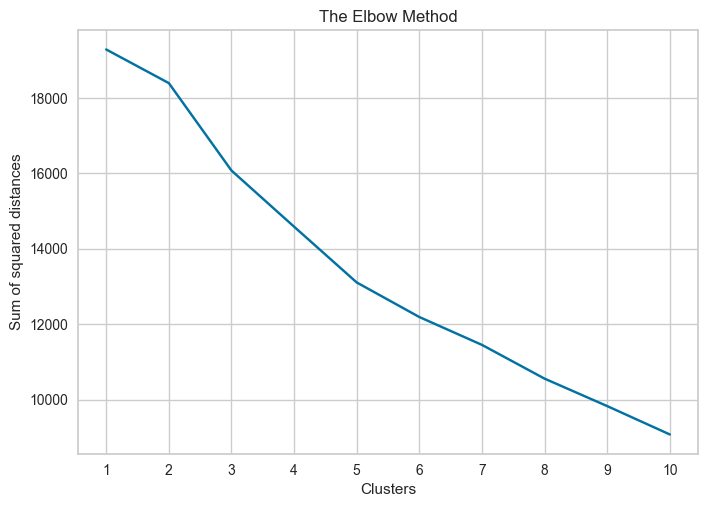

In [91]:
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



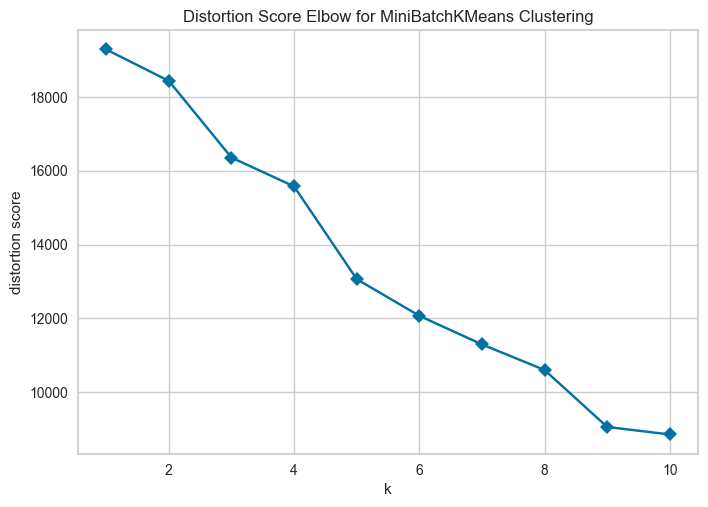

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
model = MiniBatchKMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings = False)
visualizer.fit(doc_topic_matrix)
visualizer.show()

- Avaliação da Qualidade de Clusters com Silhouette Score

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
for i in range(2,11):
    kmeans = MiniBatchKMeans(n_clusters=i, max_iter=100)
    kmeans.fit(doc_topic_matrix)
    score = silhouette_score(doc_topic_matrix, kmeans.labels_)
    print("Para o cluster: {}, a pontuação da silhueta é: {}".format(i,score))

Para o cluster: 2, a pontuação da silhueta é: 0.06986588503023967
Para o cluster: 3, a pontuação da silhueta é: 0.05536772171710816
Para o cluster: 4, a pontuação da silhueta é: 0.12716331319391072
Para o cluster: 5, a pontuação da silhueta é: 0.16867211585780684
Para o cluster: 6, a pontuação da silhueta é: 0.20118344587729642
Para o cluster: 7, a pontuação da silhueta é: 0.2203099052228035
Para o cluster: 8, a pontuação da silhueta é: 0.26626244231328416
Para o cluster: 9, a pontuação da silhueta é: 0.2406580110641112
Para o cluster: 10, a pontuação da silhueta é: 0.29512849995904067


- Visualização da qualidade dos agrupamentos, onde coeficientes mais altos indicam melhor separação e coesão dos clusters formados.

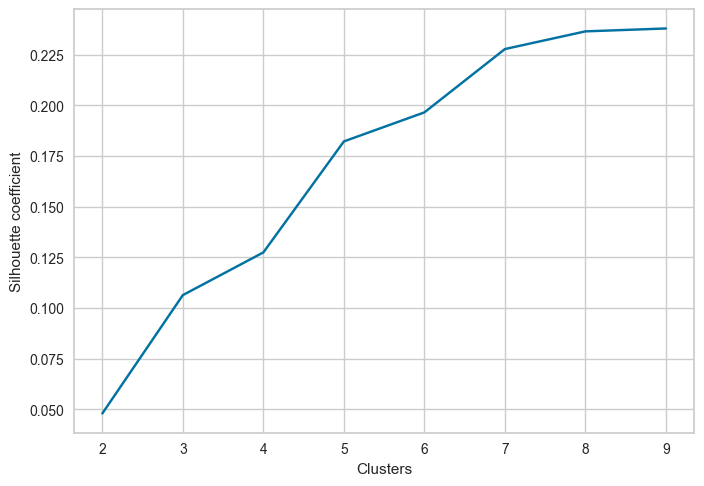

In [70]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = MiniBatchKMeans(n_clusters=i, max_iter=100)
    kmeans.fit(doc_topic_matrix)
    score = silhouette_score(doc_topic_matrix, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("Clusters")
plt.ylabel("Silhouette coefficient")
plt.show()